# Quantum Dynamics Lie Suzuki Trotter

We use a the split operator method to simulate a one dimensional wavepacket going through a square well potential.


In [108]:
%matplotlib notebook

In [139]:
%reset -f
import numpy as np
import scipy.fftpack as f
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook 

#initiate x vector
N_x = 2 ** 11 #power of two for FFT efficiency
x_min = -3
x_max = 10
dx = (x_max - x_min) / N_x
x = np.arange(x_min,x_max, dx)
p = (np.arange(N_x)) * (2 * np.pi) / (dx * N_x)
p[N_x // 2 : -1] = p[N_x // 2 : -1] - p[N_x-1] - (2 * np.pi / (dx * N_x))

#create potential well around -a,a
a = 2
V0 = 2000
V = np.zeros(N_x) +0j
left_N = (int)(N_x * (-(x_min + a) / (x_max - x_min)))
right_N = (int)(left_N + N_x * 2 * a / (x_max - x_min))
#V[left_N : right_N] =  V0

#Gaussian well
V = np.exp(-(30*x ** 2)) * V0

#create imaginary optical boundary for damping the wave when it has reached the boundary
dx_opt = 10 #width of boundary
U0 = 1
x_opt = x_max - dx_opt 
opt_N = (int)(N_x * ((x_max - x_min - dx_opt) / (x_max - x_min)))
#V[opt_N:-1] = -1j * U0 * (x[opt_N:-1] - x_opt) / dx_opt

#initiate gaussian wavepacket centered at x0
x0 = -2
sigma =0.1

p0 = 50
psi0 = 1/np.sqrt(sigma*np.sqrt(2*np.pi))*np.exp(-(x-x0)**2/(4*sigma**2) + 1j*p0*(x))


N_t = 40000
dt = 0.000002
psi_t = np.zeros((N_t,N_x)) +0.0j
psi_t[0,:] = psi0
V_matrix = np.exp(-1j * dt * V)
T_matrix = np.exp(-1j * dt * p ** 2 / 2)
for i in range(1,N_t):
    psi_t[i,:] = np.fft.ifft(T_matrix * np.fft.fft( V_matrix * psi_t[i-1,:]))


<IPython.core.display.Javascript object>


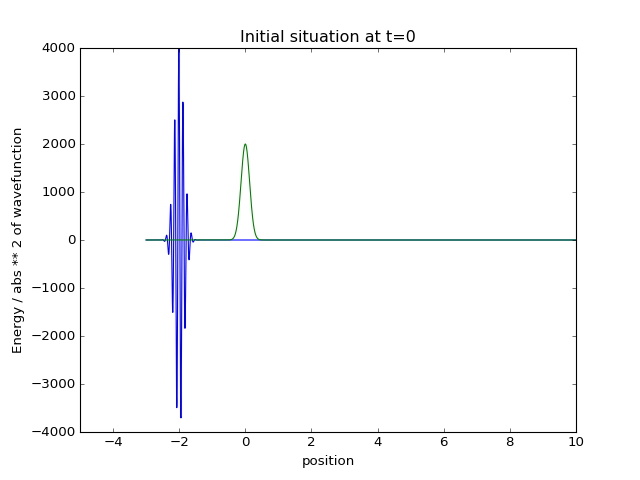

In [140]:
plt.plot(x, psi_t.real[0,:] * V0)
#plt.plot(x,abs(psi0) ** 2)
#plt.plot(x,psi0.real)
plt.plot(x,V.real)
plt.xlim((-5,10))
plt.title('Initial situation at t=0')
plt.xlabel('position')
plt.ylabel('Energy / abs ** 2 of wavefunction')

<IPython.core.display.Javascript object>


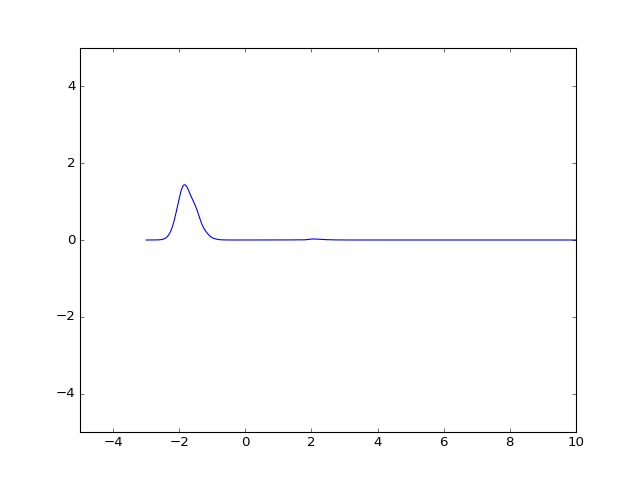

In [141]:
fig, ax = plt.subplots()

line, = ax.plot(x, psi0.real)
ax.set_ylim(-5,5)
ax.set_xlim(-5,10)
def animationFunc(i):
    #line.set_ydata(psi_t.real[i,:])  # update the data
    line.set_ydata(abs(psi_t[i*100,:])**2)
    return line,

#Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(np.ma.array(x, mask=True))
    return line,

ani = animation.FuncAnimation(fig, animationFunc, init_func=init, frames = (int)(N_t/100 ),
    interval=50, blit = True, repeat = True)
#display_animation(ani)

Let's plot the initial state

In [ ]:
print(psi0)

In [110]:
print(p0)

20


<IPython.core.display.Javascript object>


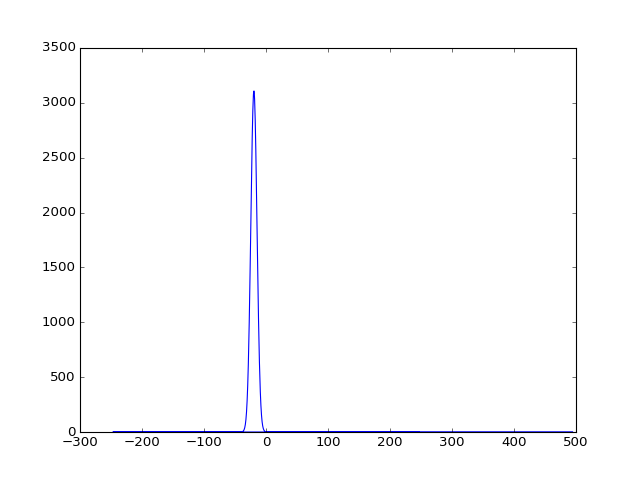

In [125]:
%matplotlib notebook
plt.plot(p, abs(np.fft.fft(psi0)) ** 2)
plt.show()

In [ ]:
print(np.sum(abs(psi0) ** 2) * (x_max - x_min) / N_x)

In [ ]:
print(V_matrix)